## Bài 7: Multi-objective Optimization

### Cài đặt NSGA-II để tìm nghiệm x∈[-10,10] để tối thiểu hóa đồng thời hai hàm f_1 (x)=x^2,f_2 (x)=〖(x-2)〗^2 

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from deap.tools.emo import sortNondominated

In [10]:
creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.Fitness)
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat,
                 creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


def evaluate(ind):
    x = ind[0]
    f1 = x**2
    f2 = (x - 2)**2
    return f1, f2


toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=1.0)
toolbox.register("select", tools.selNSGA2)


def NSGAII():
    random.seed(42)
    pop = toolbox.population(n=100)
    ngen, cxpb, mutpb = 40, 0.9, 0.1
    fitnesses = map(toolbox.evaluate, pop)
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    pop = toolbox.select(pop, len(pop))

    for gen in range(ngen):
        offspring = tools.selTournamentDCD(pop, len(pop))
        offspring = [toolbox.clone(ind) for ind in offspring]
        for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cxpb:
                toolbox.mate(ind1, ind2)
                del ind1.fitness.values, ind2.fitness.values
        for mutant in offspring:
            if random.random() < mutpb:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        pop = toolbox.select(pop + offspring, len(pop))
    return pop

c:\Users\quoca\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\quoca\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


100
[[4.00265645e+00 4.40897470e-07]
 [4.00265645e+00 4.40897470e-07]
 [6.09932443e-07 3.99687668e+00]
 [1.04567889e+00 9.55341219e-01]
 [1.14492748e+00 8.64876115e-01]
 [3.33549814e+00 3.01596644e-02]
 [7.11486622e-02 3.00420040e+00]
 [3.95732504e-01 1.87944157e+00]
 [1.10484665e-01 2.78091532e+00]
 [6.84239826e-01 1.37548822e+00]
 [1.01024424e+00 9.89807970e-01]
 [1.33306796e-01 2.67285867e+00]
 [2.71020183e+00 1.25125576e-01]
 [4.66280555e-03 3.73152385e+00]
 [6.17503833e-01 1.47424735e+00]
 [7.62694055e-01 1.26939978e+00]
 [1.87979302e+00 3.95571259e-01]
 [1.94070591e+00 3.68337062e-01]
 [1.51852970e+00 5.89384218e-01]
 [1.68949257e+00 4.90273288e-01]
 [1.61700155e-03 3.84076917e+00]
 [7.08626317e-01 1.34142851e+00]
 [1.81900544e+00 4.24185048e-01]
 [3.22867268e+00 4.12696110e-02]
 [2.59117470e+00 1.52324244e-01]
 [8.52444532e-02 2.91737834e+00]
 [2.00131975e+00 3.42599402e-01]
 [3.42927657e+00 2.19541712e-02]
 [1.40385656e+00 6.64478438e-01]
 [5.41955390e-01 1.59725061e+00]
 [2.37

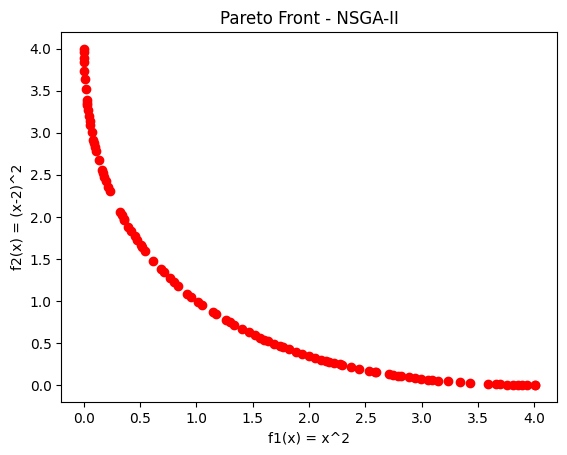

In [16]:
pop = NSGAII()
fits = np.array([ind.fitness.values for ind in pop])
print(len(fits))
print(fits)
plt.scatter(fits[:, 0], fits[:,1], c="red")
plt.xlabel("f1(x) = x^2")
plt.ylabel("f2(x) = (x-2)^2")
plt.title("Pareto Front - NSGA-II")
plt.show()

Số nghiệm Pareto: 100
[[4.00265645e+00 4.40897470e-07]
 [4.00265645e+00 4.40897470e-07]
 [6.09932443e-07 3.99687668e+00]
 [1.04567889e+00 9.55341219e-01]
 [1.14492748e+00 8.64876115e-01]
 [3.33549814e+00 3.01596644e-02]
 [7.11486622e-02 3.00420040e+00]
 [3.95732504e-01 1.87944157e+00]
 [1.10484665e-01 2.78091532e+00]
 [6.84239826e-01 1.37548822e+00]
 [1.01024424e+00 9.89807970e-01]
 [1.33306796e-01 2.67285867e+00]
 [2.71020183e+00 1.25125576e-01]
 [4.66280555e-03 3.73152385e+00]
 [6.17503833e-01 1.47424735e+00]
 [7.62694055e-01 1.26939978e+00]
 [1.87979302e+00 3.95571259e-01]
 [1.94070591e+00 3.68337062e-01]
 [1.51852970e+00 5.89384218e-01]
 [1.68949257e+00 4.90273288e-01]
 [1.61700155e-03 3.84076917e+00]
 [7.08626317e-01 1.34142851e+00]
 [1.81900544e+00 4.24185048e-01]
 [3.22867268e+00 4.12696110e-02]
 [2.59117470e+00 1.52324244e-01]
 [8.52444532e-02 2.91737834e+00]
 [2.00131975e+00 3.42599402e-01]
 [3.42927657e+00 2.19541712e-02]
 [1.40385656e+00 6.64478438e-01]
 [5.41955390e-01 1.59

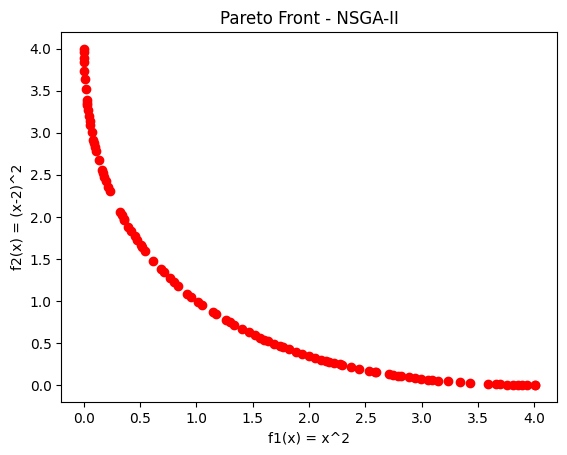

In [14]:
fronts = sortNondominated(pop, len(pop), first_front_only=True)
pareto_front = fronts[0]

print("Số nghiệm Pareto:", len(pareto_front))
# for ind in pareto_front:
#     print(ind, ind.fitness.values)
fits_front = np.array([ind.fitness.values for ind in pareto_front])
print(fits_front)
plt.scatter(fits_front[:, 0], fits_front[:, 1], c="red")
plt.xlabel("f1(x) = x^2")
plt.ylabel("f2(x) = (x-2)^2")
plt.title("Pareto Front - NSGA-II")
plt.show()